In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
the_number_of_segment = 100

In [3]:
vessel_name = 'OOCL_HAMBURG'

# 전항지 출항 확인

전항지 출항 지점 확인

In [4]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [5]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [6]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'{vessel_name}_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_HAMBURG_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_GENOA_VROK9_2022_5processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_GENOA_VROK9_2022_5processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_GENOA_VROK9_2022_5processed', '{vessel_name}_9V7282_2022_8processed'
# ]
# OOCL_HAMBURG_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_1processed',
#     'OOCL_GENOA_VROK9_2022_5processed',
#     'OOCL_NEW_YORK_VRJS2_2022_3processed'
# ]

# # OOCL_HAMBURG_voyages_list = [
# #     'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
# #     'OOCL_GENOA_VROK9_2022_5processed'
# # ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
# ]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [7]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

In [8]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [9]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [10]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [11]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# Tianjin to Busan PNIT

## OOCL_GENOA

In [12]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from shapely.geometry import LineString

In [15]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

In [16]:
interpolation_number = "1000"

### interpolation 1000

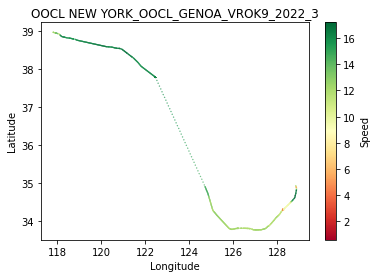

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.853624763094992
보간법 후 일반 속도 표준편차: 2.9301195520192227
보간법 후 저속 제거 평균 속도 : 13.853624763094992
보간법 후 저속 제거 속도 표준편차: 2.9301195520192227


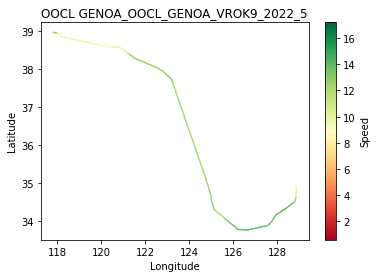

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.772648928670634
보간법 후 일반 속도 표준편차: 1.6330106359663958
보간법 후 저속 제거 평균 속도 : 11.772648928670634
보간법 후 저속 제거 속도 표준편차: 1.6330106359663958


In [17]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [18]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [19]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [20]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [21]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [22]:
interpolation_number = "2000"

### interpolation 2000

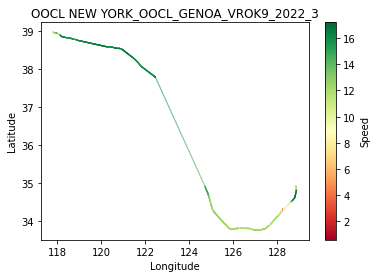

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.854861187096645
보간법 후 일반 속도 표준편차: 2.929868975183718
보간법 후 저속 제거 평균 속도 : 13.854861187096645
보간법 후 저속 제거 속도 표준편차: 2.929868975183718


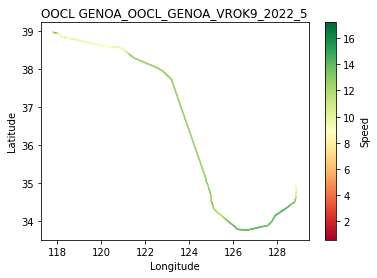

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.773408799390086
보간법 후 일반 속도 표준편차: 1.632256408882737
보간법 후 저속 제거 평균 속도 : 11.773408799390086
보간법 후 저속 제거 속도 표준편차: 1.632256408882737


In [23]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [24]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [25]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [26]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [27]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [28]:
interpolation_number = "2500"

### interpolation 2500

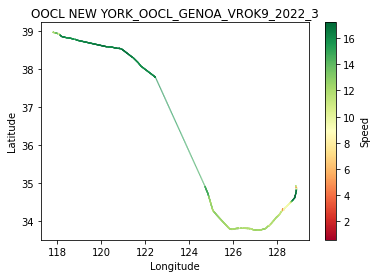

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.854975884686471
보간법 후 일반 속도 표준편차: 2.9301296556441243
보간법 후 저속 제거 평균 속도 : 13.854975884686471
보간법 후 저속 제거 속도 표준편차: 2.9301296556441243


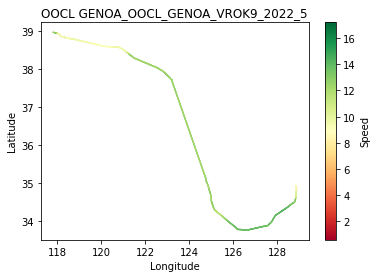

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.773654000361136
보간법 후 일반 속도 표준편차: 1.632082324676357
보간법 후 저속 제거 평균 속도 : 11.773654000361136
보간법 후 저속 제거 속도 표준편차: 1.632082324676357


In [29]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [30]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [31]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [32]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [33]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [34]:
interpolation_number = "3000"

### interpolation 3000

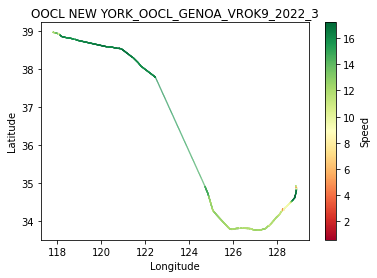

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855119381179858
보간법 후 일반 속도 표준편차: 2.929955008205254
보간법 후 저속 제거 평균 속도 : 13.855119381179858
보간법 후 저속 제거 속도 표준편차: 2.929955008205254


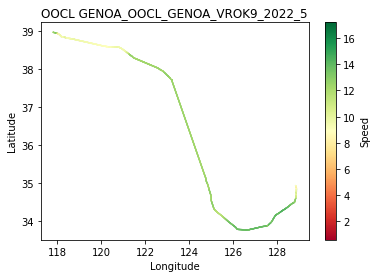

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.773766812462656
보간법 후 일반 속도 표준편차: 1.6320314448587359
보간법 후 저속 제거 평균 속도 : 11.773766812462656
보간법 후 저속 제거 속도 표준편차: 1.6320314448587359


In [35]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [36]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [37]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [38]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [39]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [40]:
interpolation_number = "4000"

### interpolation 4000

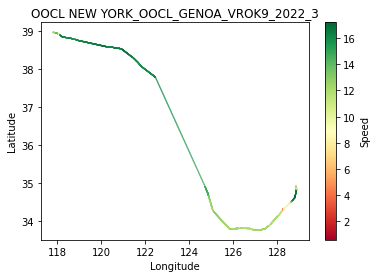

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855283666551028
보간법 후 일반 속도 표준편차: 2.9299359641263574
보간법 후 저속 제거 평균 속도 : 13.855283666551028
보간법 후 저속 제거 속도 표준편차: 2.9299359641263574


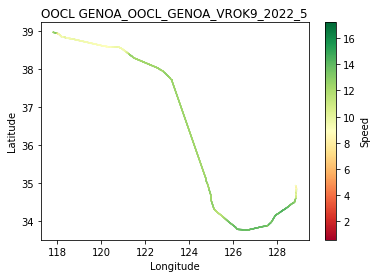

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.773867782097948
보간법 후 일반 속도 표준편차: 1.6319114266661259
보간법 후 저속 제거 평균 속도 : 11.773867782097948
보간법 후 저속 제거 속도 표준편차: 1.6319114266661259


In [41]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [42]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [43]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [44]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [45]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [46]:
interpolation_number = "5000"

### interpolation 5000

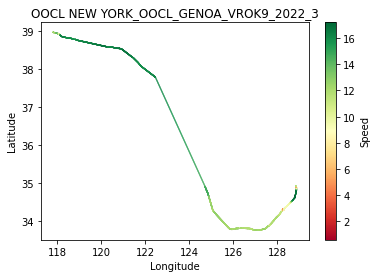

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855391389743687
보간법 후 일반 속도 표준편차: 2.9299219491049384
보간법 후 저속 제거 평균 속도 : 13.855391389743687
보간법 후 저속 제거 속도 표준편차: 2.9299219491049384


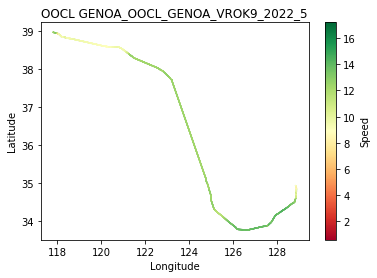

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.77394636260556
보간법 후 일반 속도 표준편차: 1.6318686394226178
보간법 후 저속 제거 평균 속도 : 11.77394636260556
보간법 후 저속 제거 속도 표준편차: 1.6318686394226178


In [47]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [48]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [49]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [50]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [51]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [52]:
interpolation_number = "7500"

### interpolation 7500

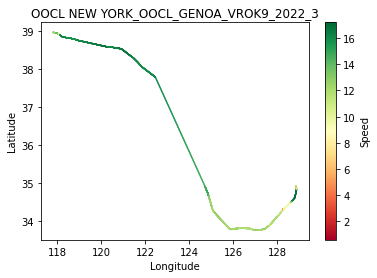

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855539437280829
보간법 후 일반 속도 표준편차: 2.9298514773743367
보간법 후 저속 제거 평균 속도 : 13.855539437280829
보간법 후 저속 제거 속도 표준편차: 2.9298514773743367


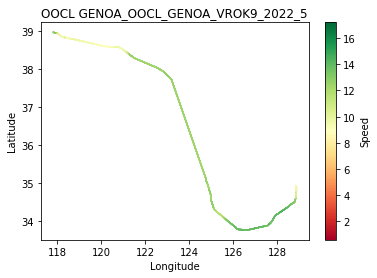

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.77404931769936
보간법 후 일반 속도 표준편차: 1.631780251353326
보간법 후 저속 제거 평균 속도 : 11.77404931769936
보간법 후 저속 제거 속도 표준편차: 1.631780251353326


In [53]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [54]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [55]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [56]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [57]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [58]:
interpolation_number = "9000"

### interpolation 9000

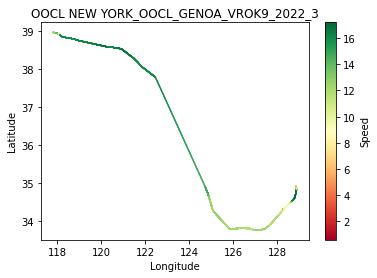

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.85557757176251
보간법 후 일반 속도 표준편차: 2.929836720613624
보간법 후 저속 제거 평균 속도 : 13.85557757176251
보간법 후 저속 제거 속도 표준편차: 2.929836720613624


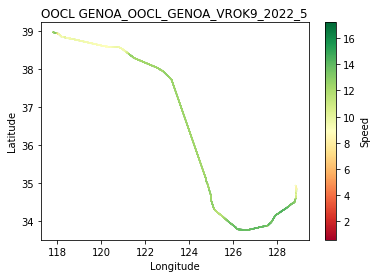

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.774084661400762
보간법 후 일반 속도 표준편차: 1.6317437766596186
보간법 후 저속 제거 평균 속도 : 11.774084661400762
보간법 후 저속 제거 속도 표준편차: 1.6317437766596186


In [59]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [60]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [61]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [62]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [63]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [64]:
interpolation_number = "10000"

### interpolation 10000

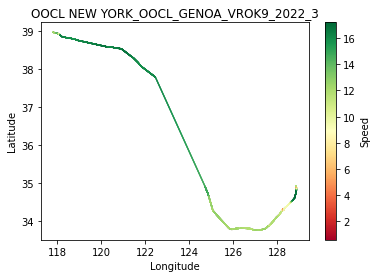

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855602083765651
보간법 후 일반 속도 표준편차: 2.929829391203889
보간법 후 저속 제거 평균 속도 : 13.855602083765651
보간법 후 저속 제거 속도 표준편차: 2.929829391203889


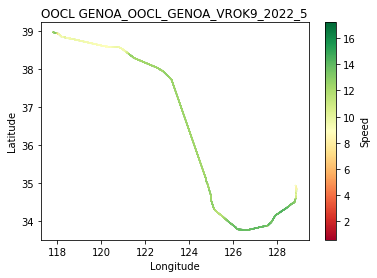

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.774095195003168
보간법 후 일반 속도 표준편차: 1.6317298613157223
보간법 후 저속 제거 평균 속도 : 11.774095195003168
보간법 후 저속 제거 속도 표준편차: 1.6317298613157223


In [65]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [66]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [67]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [68]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [69]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [70]:
interpolation_number = "11000"

### interpolation 11000

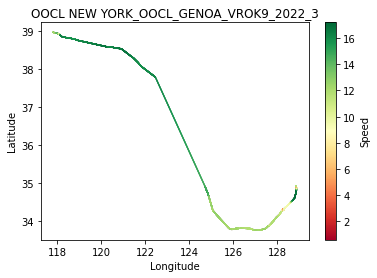

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.85562080999444
보간법 후 일반 속도 표준편차: 2.9298296885453614
보간법 후 저속 제거 평균 속도 : 13.85562080999444
보간법 후 저속 제거 속도 표준편차: 2.9298296885453614


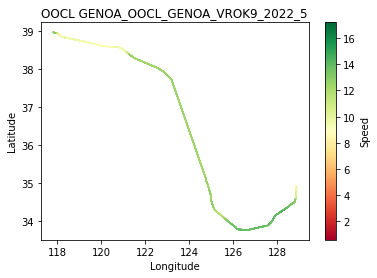

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.774114770155629
보간법 후 일반 속도 표준편차: 1.6317180600979437
보간법 후 저속 제거 평균 속도 : 11.774114770155629
보간법 후 저속 제거 속도 표준편차: 1.6317180600979437


In [71]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [72]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [73]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [74]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [75]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

## below 3 knot 제거

In [76]:
interpolation_number = "12000"

### interpolation 12000

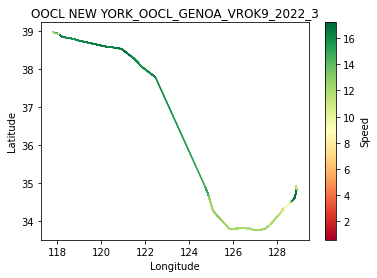

보간법 전 일반 평균 속도 : 12.833333333333334
보간법 전 일반 속도 표준편차: 2.525015707588852
보간법 전 저속 제거 평균 속도 : 12.833333333333334
보간법 전 저속 제거 속도 표준편차: 2.525015707588852
-
보간법 후 일반 평균 속도 : 13.855634625333682
보간법 후 일반 속도 표준편차: 2.9298261480741052
보간법 후 저속 제거 평균 속도 : 13.855634625333682
보간법 후 저속 제거 속도 표준편차: 2.9298261480741052


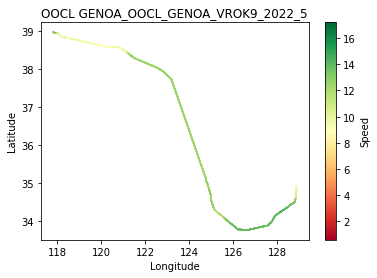

보간법 전 일반 평균 속도 : 12.093772893772893
보간법 전 일반 속도 표준편차: 1.7522668237921277
보간법 전 저속 제거 평균 속도 : 12.093772893772893
보간법 전 저속 제거 속도 표준편차: 1.7522668237921277
-
보간법 후 일반 평균 속도 : 11.774121629529201
보간법 후 일반 속도 표준편차: 1.631708099228068
보간법 후 저속 제거 평균 속도 : 11.774121629529201
보간법 후 저속 제거 속도 표준편차: 1.631708099228068


In [77]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [78]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_GENOA_VROK9_2022_3', 'OOCL_GENOA_VROK9_2022_5']

In [79]:
low_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)

In [80]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [81]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [82]:
# all_data = pd.concat(low_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [83]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 1000), AKA BHUM 7항차 저속

In [84]:
interpolation_number = 1000

In [85]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671904e+09,117.835202,38.963130,12.679795
2,1.671904e+09,117.847985,38.961132,12.916368
3,1.671904e+09,117.855392,38.960108,12.711655
4,1.671904e+09,117.873191,38.957279,12.192831
...,...,...,...,...
995,1.672109e+09,128.861192,34.900380,6.491914
996,1.672109e+09,128.858424,34.904881,7.096142
997,1.672109e+09,128.852511,34.913134,9.497078
998,1.672110e+09,128.846082,34.921940,10.513800


In [86]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [87]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [88]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [89]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.54150834808117
11.570013356720953
11.670383837865582
12.717826723156273
12.768070849374265
12.525969522489362
12.5296221757792
12.800261308719806
12.926898282844373
12.973890812885884
13.000851605208652
13.00781705385145
13.014782502491723
13.021747951132848
12.844224973389405
12.662283730004951
12.70296645372272
12.778034807860417
12.805480388158733
12.811518729096912
12.74466825921385
12.658530063625683
12.718195000780314
12.752991203309088
12.707255476190474
12.701801058450561
12.778868380397357
13.28308711125877
14.263995518642343
14.247393540967456
14.20340817643243
14.210699421280339
14.21799066612817
14.225281910975843
14.232573155823829
14.239864400671584
14.247668765739306
14.276344793253418
14.21680736678662
14.4
14.338197102420954
14.286981011286155
14.300000000000002
14.300000000000002
14.300000000000002
14.297076333891756
14.291686815788058
14.286297297684536
14.280907779580897
14.235125851765556
14.058862810563928
13.872811539090184
13.686760267616497
13.53785738013260

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [90]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [91]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [92]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:46:48.556369
평균: 0 days 03:50:13.914393599


In [93]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
222,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9250,34.1413,13.9,51.0,2022-12-22 05:25:16.933057,2022-12-21 20:25:02.000000,2022-12-21 03:44:15,under way using engine,123.256435,12.953582,2022-12-22 11:16:56.620954,2022-12-22 11:31:12.768951,0 days 00:14:16.147997
216,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8300,34.0527,13.8,34.0,2022-12-22 04:55:15.883757,2022-12-21 19:54:20.000000,2022-12-21 03:44:15,under way using engine,136.431284,14.285577,2022-12-22 11:15:39.978172,2022-12-22 11:31:12.768951,0 days 00:15:32.790779
210,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7436,33.9683,13.2,40.0,2022-12-22 04:25:07.555252,2022-12-21 19:24:49.000000,2022-12-21 03:44:15,under way using engine,148.737920,15.265054,2022-12-22 11:14:22.730185,2022-12-22 11:31:12.768951,0 days 00:16:50.038766
221,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9087,34.1269,13.8,39.0,2022-12-22 05:20:16.333186,2022-12-21 20:19:52.000000,2022-12-21 03:44:15,under way using engine,125.449652,13.135701,2022-12-22 11:11:56.021083,2022-12-22 11:31:12.768951,0 days 00:19:16.747868
197,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4696,33.8586,13.7,78.0,2022-12-22 03:19:57.103951,2022-12-21 18:16:06.000000,2022-12-21 03:44:15,under way using engine,174.908684,18.248980,2022-12-22 11:10:55.204857,2022-12-22 11:31:12.768951,0 days 00:20:17.564094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-21 22:57:44.013091,2022-12-22 11:31:12.768951,0 days 12:33:28.755860
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-21 22:50:59.988319,2022-12-22 11:31:12.768951,0 days 12:40:12.780632
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-21 22:49:24.738059,2022-12-22 11:31:12.768951,0 days 12:41:48.030892
0,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8182,38.9657,11.9,103.0,2022-12-19 21:26:42.598823,2022-12-19 12:22:56.000000,2022-12-19 11:32:13,under way using engine,1072.657959,106.868391,2022-12-21 22:45:58.622026,2022-12-22 11:31:12.768951,0 days 12:45:14.146925


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [94]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [95]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [96]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:46:48.556369
평균: 0 days 03:52:20.389020667


In [97]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
222,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9250,34.1413,13.9,51.0,2022-12-22 05:25:16.933057,2022-12-21 20:25:02.000000,2022-12-21 03:44:15,under way using engine,123.256435,12.953582,2022-12-22 11:16:56.620954,2022-12-22 11:31:12.768951,0 days 00:14:16.147997
216,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8300,34.0527,13.8,34.0,2022-12-22 04:55:15.883757,2022-12-21 19:54:20.000000,2022-12-21 03:44:15,under way using engine,136.431284,14.285577,2022-12-22 11:15:39.978172,2022-12-22 11:31:12.768951,0 days 00:15:32.790779
210,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7436,33.9683,13.2,40.0,2022-12-22 04:25:07.555252,2022-12-21 19:24:49.000000,2022-12-21 03:44:15,under way using engine,148.737920,15.265054,2022-12-22 11:14:22.730185,2022-12-22 11:31:12.768951,0 days 00:16:50.038766
221,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9087,34.1269,13.8,39.0,2022-12-22 05:20:16.333186,2022-12-21 20:19:52.000000,2022-12-21 03:44:15,under way using engine,125.449652,13.135701,2022-12-22 11:11:56.021083,2022-12-22 11:31:12.768951,0 days 00:19:16.747868
197,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4696,33.8586,13.7,78.0,2022-12-22 03:19:57.103951,2022-12-21 18:16:06.000000,2022-12-21 03:44:15,under way using engine,174.908684,18.248980,2022-12-22 11:10:55.204857,2022-12-22 11:31:12.768951,0 days 00:20:17.564094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-21 22:50:59.988319,2022-12-22 11:31:12.768951,0 days 12:40:12.780632
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-21 22:49:24.738059,2022-12-22 11:31:12.768951,0 days 12:41:48.030892
7,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0600,38.9242,6.6,118.0,2022-12-19 22:26:51.560222,2022-12-19 13:23:58.000000,2022-12-19 01:08:15,under way using engine,1051.494428,127.628908,2022-12-21 22:47:40.773909,2022-12-22 11:31:12.768951,0 days 12:43:31.995042
0,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8182,38.9657,11.9,103.0,2022-12-19 21:26:42.598823,2022-12-19 12:22:56.000000,2022-12-19 11:32:13,under way using engine,1072.657959,106.868391,2022-12-21 22:45:58.622026,2022-12-22 11:31:12.768951,0 days 12:45:14.146925


# ETA 실험 (interpolation 2000), AKA BHUM 7항차 저속

In [98]:
interpolation_number = 2000

In [99]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.826397,38.964616,12.264690
2,1.671904e+09,117.835194,38.963131,12.679380
3,1.671904e+09,117.843621,38.961751,12.989602
4,1.671904e+09,117.847978,38.961133,12.916573
...,...,...,...,...
1995,1.672109e+09,128.852505,34.913142,9.499480
1996,1.672110e+09,128.849472,34.917347,10.525767
1997,1.672110e+09,128.846079,34.921945,10.513693
1998,1.672110e+09,128.842689,34.926547,10.406846


In [100]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [101]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [102]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [103]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.580350403825168
11.503500349583625
11.733454182811744
12.715020474633075
12.764614434792119
12.524136436315755
12.536645776557753
12.800390370315217
12.927873865632332
12.974842887655996
13.00098924163758
13.007951205809968
13.01491316998775
13.021875134165745
12.837158760003433
12.663082798840625
12.703020424667127
12.777656245671093
12.80879307898384
12.809656562499018
12.744096389493329
12.658261770227606
12.7190320947607
12.752440612963396
12.70788640509796
12.702308297000851
12.780715686946312
13.292761372432727
14.27083972020922
14.24575160550547
14.203479301632361
14.210766899034018
14.218054496435716
14.225342093837337
14.232629691239032
14.239917288640692
14.247773934310791
14.27631107534798
14.217962031064824
14.399731150777464
14.337497744015078
14.287219355731262
14.300000000000002
14.300000000000002
14.299994614147892
14.2970642014098
14.291677379413253
14.286290557416738
14.280903735420225
14.23505483039932
14.058909346647539
13.872951147351333
13.686992948057432
13.53

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [104]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [105]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [106]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 10:00:36.836692
평균: 0 days 02:37:27.743482678


In [107]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
154,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.8185,33.9651,13.4,117.0,2022-12-21 20:58:58.581590,2022-12-21 11:58:31.000000,2022-12-20 11:56:16,under way using engine,296.903592,30.663512,2022-12-22 11:31:21.951564,2022-12-22 11:31:12.768951,0 days 00:00:09.182613
196,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4605,33.8576,13.7,78.0,2022-12-22 03:14:57.228920,2022-12-21 18:14:06.000000,2022-12-21 03:44:15,under way using engine,175.579398,18.318959,2022-12-22 11:31:03.159450,2022-12-22 11:31:12.768951,0 days 00:00:09.609501
209,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7249,33.9559,13.7,50.0,2022-12-22 04:20:06.868798,2022-12-21 19:19:30.000000,2022-12-21 03:44:15,under way using engine,150.912037,15.745306,2022-12-22 11:31:02.851121,2022-12-22 11:31:12.768951,0 days 00:00:09.917830
160,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.9367,33.9121,13.4,118.0,2022-12-21 21:29:02.551484,2022-12-21 12:28:12.000000,2022-12-20 11:56:16,under way using engine,289.315221,29.879803,2022-12-22 11:31:28.326853,2022-12-22 11:31:12.768951,0 days 00:00:15.557902
174,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,126.4504,33.7660,13.9,93.0,2022-12-21 23:34:22.243507,2022-12-21 14:31:42.000000,2022-12-21 02:20:14,under way using engine,255.314919,26.832211,2022-12-22 11:31:31.344955,2022-12-22 11:31:12.768951,0 days 00:00:18.576004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 01:43:07.651749,2022-12-22 11:31:12.768951,0 days 09:48:05.117202
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 01:38:08.870767,2022-12-22 11:31:12.768951,0 days 09:53:03.898184
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 01:35:37.298552,2022-12-22 11:31:12.768951,0 days 09:55:35.470399
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-22 01:31:27.090872,2022-12-22 11:31:12.768951,0 days 09:59:45.678079


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [108]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [109]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [110]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 10:00:36.836692
평균: 0 days 02:39:05.503850837


In [111]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
154,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.8185,33.9651,13.4,117.0,2022-12-21 20:58:58.581590,2022-12-21 11:58:31.000000,2022-12-20 11:56:16,under way using engine,296.903592,30.663512,2022-12-22 11:31:21.951564,2022-12-22 11:31:12.768951,0 days 00:00:09.182613
196,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4605,33.8576,13.7,78.0,2022-12-22 03:14:57.228920,2022-12-21 18:14:06.000000,2022-12-21 03:44:15,under way using engine,175.579398,18.318959,2022-12-22 11:31:03.159450,2022-12-22 11:31:12.768951,0 days 00:00:09.609501
209,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7249,33.9559,13.7,50.0,2022-12-22 04:20:06.868798,2022-12-21 19:19:30.000000,2022-12-21 03:44:15,under way using engine,150.912037,15.745306,2022-12-22 11:31:02.851121,2022-12-22 11:31:12.768951,0 days 00:00:09.917830
160,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.9367,33.9121,13.4,118.0,2022-12-21 21:29:02.551484,2022-12-21 12:28:12.000000,2022-12-20 11:56:16,under way using engine,289.315221,29.879803,2022-12-22 11:31:28.326853,2022-12-22 11:31:12.768951,0 days 00:00:15.557902
174,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,126.4504,33.7660,13.9,93.0,2022-12-21 23:34:22.243507,2022-12-21 14:31:42.000000,2022-12-21 02:20:14,under way using engine,255.314919,26.832211,2022-12-22 11:31:31.344955,2022-12-22 11:31:12.768951,0 days 00:00:18.576004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 01:43:07.651749,2022-12-22 11:31:12.768951,0 days 09:48:05.117202
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 01:38:08.870767,2022-12-22 11:31:12.768951,0 days 09:53:03.898184
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 01:35:37.298552,2022-12-22 11:31:12.768951,0 days 09:55:35.470399
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-22 01:31:27.090872,2022-12-22 11:31:12.768951,0 days 09:59:45.678079


# ETA 실험 (interpolation 2500), AKA BHUM 7항차 저속

In [112]:
interpolation_number = 2500

In [113]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.824637,38.964913,12.181719
2,1.671903e+09,117.831673,38.963725,12.513438
3,1.671904e+09,117.838710,38.962538,12.845157
4,1.671904e+09,117.845015,38.961542,12.998450
...,...,...,...,...
2495,1.672110e+09,128.850140,34.916443,10.459758
2496,1.672110e+09,128.847434,34.920105,10.556405
2497,1.672110e+09,128.844722,34.923786,10.470937
2498,1.672110e+09,128.842011,34.927468,10.385468


In [114]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [115]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [116]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [117]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.586249048023365
11.487244672271004
11.748303861633127
12.714417525606018
12.763943227587452
12.523461312553055
12.53879599467789
12.800536465130536
12.928068865075065
12.97502602150443
13.001016752398538
13.007978020099493
13.014939287800443
13.021900555501865
12.8359666443116
12.663231671696307
12.702925568329487
12.777758688322876
12.809147455425936
12.809280837961039
12.74390438378527
12.658375850613943
12.719166146761177
12.752354087579219
12.707807230192072
12.702351941681535
12.781025526450135
13.294898062149933
14.27157537145978
14.24546344773437
14.203490840087433
14.210780386484188
14.218067254834489
14.225354123184816
14.232640991535117
14.239927859885416
14.247808257787261
14.276295761701663
14.218232775927278
14.399707621331318
14.337357956289072
14.28726729612737
14.300000000000002
14.300000000000002
14.299994505743255
14.297061776369855
14.291675493271098
14.286289210172363
14.280902927073562
14.235024731760836
14.0589186482825
13.872979052244228
13.687039456205913
13.

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [118]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [119]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [120]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 09:28:17.988800
평균: 0 days 02:23:30.362424757


In [121]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
195,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4389,33.8551,13.4,76.0,2022-12-22 03:09:55.916823,2022-12-21 18:09:15.000000,2022-12-21 03:44:15,under way using engine,177.187233,18.299485,2022-12-22 11:31:13.177957,2022-12-22 11:31:12.768951,0 days 00:00:00.409006
151,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.4864,34.1331,11.6,117.0,2022-12-21 19:18:42.526977,2022-12-21 10:17:43.000000,2022-12-20 11:56:16,under way using engine,319.085937,31.672219,2022-12-22 11:31:50.753867,2022-12-22 11:31:12.768951,0 days 00:00:37.984916
208,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7056,33.9455,13.9,55.0,2022-12-22 04:15:06.035612,2022-12-21 19:14:27.000000,2022-12-21 03:44:15,under way using engine,152.957458,16.074998,2022-12-22 11:30:31.665367,2022-12-22 11:31:12.768951,0 days 00:00:41.103584
188,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.2627,33.8385,13.8,78.0,2022-12-22 02:34:49.998012,2022-12-21 17:30:32.000000,2022-12-21 03:44:15,under way using engine,190.302662,19.926392,2022-12-22 11:30:09.032194,2022-12-22 11:31:12.768951,0 days 00:01:03.736757
163,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0185,33.8751,13.6,119.0,2022-12-21 21:49:05.708937,2022-12-21 12:48:52.000000,2022-12-20 11:56:16,under way using engine,284.266838,29.555458,2022-12-22 11:30:00.685819,2022-12-22 11:31:12.768951,0 days 00:01:12.083132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 02:17:57.139995,2022-12-22 11:31:12.768951,0 days 09:13:15.628956
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 02:14:36.334372,2022-12-22 11:31:12.768951,0 days 09:16:36.434579
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:09:37.553390,2022-12-22 11:31:12.768951,0 days 09:21:35.215561
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:07:56.146444,2022-12-22 11:31:12.768951,0 days 09:23:16.622507


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [122]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [123]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [124]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 09:28:17.988800
평균: 0 days 02:25:03.893655454


In [125]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
195,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.4389,33.8551,13.4,76.0,2022-12-22 03:09:55.916823,2022-12-21 18:09:15.000000,2022-12-21 03:44:15,under way using engine,177.187233,18.299485,2022-12-22 11:31:13.177957,2022-12-22 11:31:12.768951,0 days 00:00:00.409006
151,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.4864,34.1331,11.6,117.0,2022-12-21 19:18:42.526977,2022-12-21 10:17:43.000000,2022-12-20 11:56:16,under way using engine,319.085937,31.672219,2022-12-22 11:31:50.753867,2022-12-22 11:31:12.768951,0 days 00:00:37.984916
208,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7056,33.9455,13.9,55.0,2022-12-22 04:15:06.035612,2022-12-21 19:14:27.000000,2022-12-21 03:44:15,under way using engine,152.957458,16.074998,2022-12-22 11:30:31.665367,2022-12-22 11:31:12.768951,0 days 00:00:41.103584
188,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.2627,33.8385,13.8,78.0,2022-12-22 02:34:49.998012,2022-12-21 17:30:32.000000,2022-12-21 03:44:15,under way using engine,190.302662,19.926392,2022-12-22 11:30:09.032194,2022-12-22 11:31:12.768951,0 days 00:01:03.736757
163,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0185,33.8751,13.6,119.0,2022-12-21 21:49:05.708937,2022-12-21 12:48:52.000000,2022-12-20 11:56:16,under way using engine,284.266838,29.555458,2022-12-22 11:30:00.685819,2022-12-22 11:31:12.768951,0 days 00:01:12.083132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 02:17:57.139995,2022-12-22 11:31:12.768951,0 days 09:13:15.628956
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 02:14:36.334372,2022-12-22 11:31:12.768951,0 days 09:16:36.434579
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:09:37.553390,2022-12-22 11:31:12.768951,0 days 09:21:35.215561
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:07:56.146444,2022-12-22 11:31:12.768951,0 days 09:23:16.622507


# ETA 실험 (interpolation 3000), AKA BHUM 7항차 저속

In [126]:
interpolation_number = 3000

In [127]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.823464,38.965111,12.126414
2,1.671903e+09,117.829327,38.964121,12.402828
3,1.671904e+09,117.835191,38.963132,12.679242
4,1.671904e+09,117.841054,38.962142,12.955656
...,...,...,...,...
2995,1.672110e+09,128.848337,34.918878,10.584876
2996,1.672110e+09,128.846078,34.921946,10.513657
2997,1.672110e+09,128.843818,34.925014,10.442438
2998,1.672110e+09,128.841559,34.928082,10.371219


In [128]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [129]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [130]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [131]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.590527758886678
11.476742476764473
11.7572897146025
12.713979755538931
12.763635597606756
12.523002089140407
12.53970916267632
12.80049516333452
12.928198843028712
12.975146058648477
13.00103508984941
13.007995893311131
13.014956696772856
13.021917500234723
12.835125579223924
12.663319060095967
12.702874937056164
12.777591861766622
12.809634490574455
12.809042957940163
12.743820953557748
12.658324986965393
12.71929517886938
12.752292478799069
12.707765848091976
12.702370341009498
12.781295094952734
13.296351755086947
14.2723601099309
14.245264818549197
14.20349297652141
14.21078937661852
14.218075759015631
14.225362141412718
14.232648523809834
14.239934906206893
14.247814607751582
14.276266233986956
14.21829145458114
14.399713414219987
14.337220371427845
14.28728396833935
14.300000000000004
14.300000000000004
14.299994762909703
14.297060159946122
14.291674236052625
14.286288312159146
14.280902388265641
14.235013376297486
14.058924848334952
13.872997652404221
13.687070456472687
13.53

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [132]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [133]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [134]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 09:05:44.353498
평균: 0 days 02:14:44.119391892


In [135]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
175,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,126.5471,33.7599,13.7,91.0,2022-12-21 23:54:25.427446,2022-12-21 14:52:51.000000,2022-12-21 02:50:14,under way using engine,248.174345,25.893104,2022-12-22 11:31:16.248194,2022-12-22 11:31:12.768951,0 days 00:00:03.479243
201,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5725,33.8721,12.0,51.0,2022-12-22 03:40:00.254409,2022-12-21 18:39:17.000000,2022-12-21 03:44:15,under way using engine,167.254246,16.688860,2022-12-22 11:31:16.937579,2022-12-22 11:31:12.768951,0 days 00:00:04.168628
157,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.8757,33.9394,13.6,118.0,2022-12-21 21:14:00.437288,2022-12-21 12:12:54.000000,2022-12-20 11:56:16,under way using engine,293.195027,30.483729,2022-12-22 11:30:39.830458,2022-12-22 11:31:12.768951,0 days 00:00:32.938493
225,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9796,34.1659,13.9,67.0,2022-12-22 05:40:20.354314,2022-12-21 20:38:22.000000,2022-12-21 03:44:15,under way using engine,117.897936,12.390433,2022-12-22 11:30:32.365892,2022-12-22 11:31:12.768951,0 days 00:00:40.403059
162,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.9927,33.8868,13.4,118.0,2022-12-21 21:44:04.418569,2022-12-21 12:42:22.000000,2022-12-20 11:56:16,under way using engine,285.840299,29.520921,2022-12-22 11:30:31.535731,2022-12-22 11:31:12.768951,0 days 00:00:41.233220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 02:40:28.926314,2022-12-22 11:31:12.768951,0 days 08:50:43.842637
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 02:36:34.716853,2022-12-22 11:31:12.768951,0 days 08:54:38.052098
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:31:35.935871,2022-12-22 11:31:12.768951,0 days 08:59:36.833080
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:30:29.781746,2022-12-22 11:31:12.768951,0 days 09:00:42.987205


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [136]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [137]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [138]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 09:05:44.353498
평균: 0 days 02:16:14.463945462


In [139]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
175,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,126.5471,33.7599,13.7,91.0,2022-12-21 23:54:25.427446,2022-12-21 14:52:51.000000,2022-12-21 02:50:14,under way using engine,248.174345,25.893104,2022-12-22 11:31:16.248194,2022-12-22 11:31:12.768951,0 days 00:00:03.479243
201,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5725,33.8721,12.0,51.0,2022-12-22 03:40:00.254409,2022-12-21 18:39:17.000000,2022-12-21 03:44:15,under way using engine,167.254246,16.688860,2022-12-22 11:31:16.937579,2022-12-22 11:31:12.768951,0 days 00:00:04.168628
157,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.8757,33.9394,13.6,118.0,2022-12-21 21:14:00.437288,2022-12-21 12:12:54.000000,2022-12-20 11:56:16,under way using engine,293.195027,30.483729,2022-12-22 11:30:39.830458,2022-12-22 11:31:12.768951,0 days 00:00:32.938493
225,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.9796,34.1659,13.9,67.0,2022-12-22 05:40:20.354314,2022-12-21 20:38:22.000000,2022-12-21 03:44:15,under way using engine,117.897936,12.390433,2022-12-22 11:30:32.365892,2022-12-22 11:31:12.768951,0 days 00:00:40.403059
162,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.9927,33.8868,13.4,118.0,2022-12-21 21:44:04.418569,2022-12-21 12:42:22.000000,2022-12-20 11:56:16,under way using engine,285.840299,29.520921,2022-12-22 11:30:31.535731,2022-12-22 11:31:12.768951,0 days 00:00:41.233220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 02:40:28.926314,2022-12-22 11:31:12.768951,0 days 08:50:43.842637
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 02:36:34.716853,2022-12-22 11:31:12.768951,0 days 08:54:38.052098
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:31:35.935871,2022-12-22 11:31:12.768951,0 days 08:59:36.833080
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:30:29.781746,2022-12-22 11:31:12.768951,0 days 09:00:42.987205


# ETA 실험 (interpolation 4000), AKA BHUM 7항차 저속

In [140]:
interpolation_number = 4000

In [141]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.821997,38.965358,12.057293
2,1.671903e+09,117.826395,38.964616,12.264586
3,1.671903e+09,117.830792,38.963874,12.471880
4,1.671904e+09,117.835189,38.963132,12.679173
...,...,...,...,...
3995,1.672110e+09,128.846077,34.921947,10.513639
3996,1.672110e+09,128.844383,34.924248,10.460229
3997,1.672110e+09,128.842689,34.926548,10.406820
3998,1.672110e+09,128.840994,34.928849,10.353410


In [142]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [143]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [144]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [145]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.595241137802002
11.464351391971704
11.769368643714726
12.713584969347178
12.763126077338757
12.522716553090598
12.54130015035424
12.800728634919727
12.92836129109358
12.975300584259724
13.001058008223719
13.008018231473471
13.014978454723058
13.021938677972623
12.833917979276833
12.663422120148022
12.703022498438191
12.777571156872078
12.810164162090041
12.808722807118917
12.743706762495076
12.6583330831987
12.71940183659895
12.75227665500664
12.707726943571396
12.702424791009099
12.781606585031184
13.297939271721038
14.273435308833546
14.245031354373442
14.203500026004406
14.210800612600414
14.218086387647123
14.225372162693834
14.23265793774054
14.239943712787328
14.247841967041875
14.276244509289214
14.218382216465296
14.39974481336954
14.337113669385246
14.287327769329185
14.3
14.3
14.299994275703522
14.297058139719628
14.291672664765377
14.286287189811054
14.280901714856807
14.235011207233317
14.058932597239608
13.873020899113987
13.687109200991205
13.53803865439782
13.55414218

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [146]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [147]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [148]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:38:15.836604
평균: 0 days 02:04:15.523171841


In [149]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
213,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7881,34.0093,13.6,36.0,2022-12-22 04:40:09.587191,2022-12-21 19:39:37.000000,2022-12-21 03:44:15,under way using engine,142.605171,14.826777,2022-12-22 11:31:15.360699,2022-12-22 11:31:12.768951,0 days 00:00:02.591748
230,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0792,34.2016,13.8,63.0,2022-12-22 06:05:23.312672,2022-12-21 21:01:49.000000,2022-12-21 03:44:15,under way using engine,109.017496,11.415108,2022-12-22 11:31:18.990157,2022-12-22 11:31:12.768951,0 days 00:00:06.221206
140,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0915,34.3867,12.7,154.0,2022-12-21 17:08:22.866003,2022-12-21 08:07:51.000000,2022-12-20 11:56:16,under way using engine,346.977588,35.121589,2022-12-22 11:31:22.737053,2022-12-22 11:31:12.768951,0 days 00:00:09.968102
200,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5535,33.8675,13.6,76.0,2022-12-22 03:34:59.665431,2022-12-21 18:34:35.000000,2022-12-21 03:44:15,under way using engine,168.823840,17.552754,2022-12-22 11:30:22.914856,2022-12-22 11:31:12.768951,0 days 00:00:49.854095
167,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.1175,33.8307,13.7,119.0,2022-12-21 22:14:11.502583,2022-12-21 13:13:23.000000,2022-12-20 11:56:16,under way using engine,278.358413,29.042338,2022-12-22 11:32:04.644878,2022-12-22 11:31:12.768951,0 days 00:00:51.875927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:07:30.992828,2022-12-22 11:31:12.768951,0 days 08:23:41.776123
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:03:19.991208,2022-12-22 11:31:12.768951,0 days 08:27:52.777743
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:58:21.210226,2022-12-22 11:31:12.768951,0 days 08:32:51.558725
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:57:58.298640,2022-12-22 11:31:12.768951,0 days 08:33:14.470311


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [150]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [151]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [152]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:38:15.836604
평균: 0 days 02:05:41.940965355


In [153]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
213,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7881,34.0093,13.6,36.0,2022-12-22 04:40:09.587191,2022-12-21 19:39:37.000000,2022-12-21 03:44:15,under way using engine,142.605171,14.826777,2022-12-22 11:31:15.360699,2022-12-22 11:31:12.768951,0 days 00:00:02.591748
230,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0792,34.2016,13.8,63.0,2022-12-22 06:05:23.312672,2022-12-21 21:01:49.000000,2022-12-21 03:44:15,under way using engine,109.017496,11.415108,2022-12-22 11:31:18.990157,2022-12-22 11:31:12.768951,0 days 00:00:06.221206
140,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0915,34.3867,12.7,154.0,2022-12-21 17:08:22.866003,2022-12-21 08:07:51.000000,2022-12-20 11:56:16,under way using engine,346.977588,35.121589,2022-12-22 11:31:22.737053,2022-12-22 11:31:12.768951,0 days 00:00:09.968102
200,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5535,33.8675,13.6,76.0,2022-12-22 03:34:59.665431,2022-12-21 18:34:35.000000,2022-12-21 03:44:15,under way using engine,168.823840,17.552754,2022-12-22 11:30:22.914856,2022-12-22 11:31:12.768951,0 days 00:00:49.854095
167,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.1175,33.8307,13.7,119.0,2022-12-21 22:14:11.502583,2022-12-21 13:13:23.000000,2022-12-20 11:56:16,under way using engine,278.358413,29.042338,2022-12-22 11:32:04.644878,2022-12-22 11:31:12.768951,0 days 00:00:51.875927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:07:30.992828,2022-12-22 11:31:12.768951,0 days 08:23:41.776123
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:03:19.991208,2022-12-22 11:31:12.768951,0 days 08:27:52.777743
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-22 02:58:21.210226,2022-12-22 11:31:12.768951,0 days 08:32:51.558725
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 02:57:58.298640,2022-12-22 11:31:12.768951,0 days 08:33:14.470311


# ETA 실험 (interpolation 5000), AKA BHUM 7항차 저속

In [154]:
interpolation_number = 5000

In [155]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.821118,38.965506,12.015826
2,1.671903e+09,117.824635,38.964913,12.181653
3,1.671903e+09,117.828153,38.964319,12.347479
4,1.671903e+09,117.831671,38.963726,12.513305
...,...,...,...,...
4995,1.672110e+09,128.844721,34.923788,10.470903
4996,1.672110e+09,128.843366,34.925628,10.428177
4997,1.672110e+09,128.842011,34.927469,10.385451
4998,1.672110e+09,128.840655,34.929309,10.342726


In [156]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [157]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [158]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [159]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.59829914841508
11.456713830743631
11.775999042503123
12.71325631740303
12.762877623668146
12.522397766687504
12.542042340140924
12.800801706800566
12.928458746934444
12.97539369867978
13.00107175741401
13.00803163258371
13.014991507752084
13.021951382921605
12.83326555014696
12.663506354731386
12.703005969850057
12.777508698226061
12.810477713780523
12.808530675007589
12.743643581156494
12.658304261787805
12.719478605009565
12.752276570306863
12.707696378642808
12.70243550173398
12.781776784473111
13.298977526228793
14.274071603749412
14.244892314632768
14.20350659066118
14.210807353290456
14.21809276397557
14.225378174660653
14.232663585345751
14.239948996030881
14.247854778119274
14.27623636823057
14.218501198059778
14.399751133719171
14.337050589883907
14.287344777986961
14.299999999999997
14.299999999999997
14.299994289386849
14.297056927745349
14.291671722118702
14.286286516492055
14.280901310865408
14.235015613279497
14.058937245959003
13.873034845281875
13.68713244460159
13.5

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [160]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [161]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [162]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:21:32.821477
평균: 0 days 01:58:42.571965817


In [163]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
186,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.2312,33.8339,13.9,77.0,2022-12-22 02:24:48.561774,2022-12-21 17:23:30.000000,2022-12-21 03:44:15,under way using engine,192.818397,20.264166,2022-12-22 11:31:10.502264,2022-12-22 11:31:12.768951,0 days 00:00:02.266687
181,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0986,33.8150,13.9,76.0,2022-12-22 01:54:44.036879,2022-12-21 16:54:06.000000,2022-12-21 03:44:15,under way using engine,203.501151,21.386866,2022-12-22 11:31:09.936126,2022-12-22 11:31:12.768951,0 days 00:00:02.832825
166,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0984,33.8390,13.8,117.0,2022-12-21 22:09:08.507365,2022-12-21 13:08:41.000000,2022-12-20 11:56:16,under way using engine,279.492617,29.265378,2022-12-22 11:31:04.971179,2022-12-22 11:31:12.768951,0 days 00:00:07.797772
193,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3951,33.8522,13.6,81.0,2022-12-22 02:59:54.098072,2022-12-21 17:59:35.000000,2022-12-21 03:44:15,under way using engine,180.304403,18.746397,2022-12-22 11:31:43.833169,2022-12-22 11:31:12.768951,0 days 00:00:31.064218
139,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0828,34.4021,12.7,154.0,2022-12-21 17:03:22.215335,2022-12-21 08:03:02.000000,2022-12-20 11:56:16,under way using engine,347.412870,35.165649,2022-12-22 11:31:47.031672,2022-12-22 11:31:12.768951,0 days 00:00:34.262721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:24:42.307318,2022-12-22 11:31:12.768951,0 days 08:06:30.461633
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:23:58.207705,2022-12-22 11:31:12.768951,0 days 08:07:14.561246
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:19:36.561067,2022-12-22 11:31:12.768951,0 days 08:11:36.207884
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:14:41.313767,2022-12-22 11:31:12.768951,0 days 08:16:31.455184


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [164]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [165]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [166]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:21:32.821477
평균: 0 days 02:00:06.403736916


In [167]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
186,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.2312,33.8339,13.9,77.0,2022-12-22 02:24:48.561774,2022-12-21 17:23:30.000000,2022-12-21 03:44:15,under way using engine,192.818397,20.264166,2022-12-22 11:31:10.502264,2022-12-22 11:31:12.768951,0 days 00:00:02.266687
181,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0986,33.8150,13.9,76.0,2022-12-22 01:54:44.036879,2022-12-21 16:54:06.000000,2022-12-21 03:44:15,under way using engine,203.501151,21.386866,2022-12-22 11:31:09.936126,2022-12-22 11:31:12.768951,0 days 00:00:02.832825
166,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0984,33.8390,13.8,117.0,2022-12-21 22:09:08.507365,2022-12-21 13:08:41.000000,2022-12-20 11:56:16,under way using engine,279.492617,29.265378,2022-12-22 11:31:04.971179,2022-12-22 11:31:12.768951,0 days 00:00:07.797772
193,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3951,33.8522,13.6,81.0,2022-12-22 02:59:54.098072,2022-12-21 17:59:35.000000,2022-12-21 03:44:15,under way using engine,180.304403,18.746397,2022-12-22 11:31:43.833169,2022-12-22 11:31:12.768951,0 days 00:00:31.064218
139,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0828,34.4021,12.7,154.0,2022-12-21 17:03:22.215335,2022-12-21 08:03:02.000000,2022-12-20 11:56:16,under way using engine,347.412870,35.165649,2022-12-22 11:31:47.031672,2022-12-22 11:31:12.768951,0 days 00:00:34.262721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:24:42.307318,2022-12-22 11:31:12.768951,0 days 08:06:30.461633
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:23:58.207705,2022-12-22 11:31:12.768951,0 days 08:07:14.561246
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:19:36.561067,2022-12-22 11:31:12.768951,0 days 08:11:36.207884
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:14:41.313767,2022-12-22 11:31:12.768951,0 days 08:16:31.455184


# ETA 실험 (interpolation 7500), AKA BHUM 7항차 저속

In [168]:
interpolation_number = 7500

In [169]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819945,38.965704,11.960543
2,1.671903e+09,117.822290,38.965309,12.071087
3,1.671903e+09,117.824635,38.964913,12.181630
4,1.671903e+09,117.826980,38.964517,12.292174
...,...,...,...,...
7495,1.672110e+09,128.842914,34.926242,10.413928
7496,1.672110e+09,128.842010,34.927469,10.385446
7497,1.672110e+09,128.841107,34.928696,10.356964
7498,1.672110e+09,128.840203,34.929923,10.328482


In [170]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [171]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [172]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [173]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.602179382500218
11.446438932747153
11.785895433733627
12.712885896495875
12.762619275791122
12.522101551527147
12.543240065386234
12.800895254578833
12.92858867289346
12.975516225051267
13.001090087529557
13.008049498645008
13.015008909760708
13.021968320876121
12.832365425547358
12.663598981967585
12.70300721949652
12.777456341022965
12.810921014978302
12.80828545593373
12.74353244376578
12.658305341774678
12.719581443134123
12.752251587422471
12.707694725327983
12.702480451873692
12.782021742362247
13.300307036904949
14.274840952307601
14.24468609412272
14.20351806712083
14.210816339828492
14.218101264754797
14.225386189681087
14.232671114607387
14.239956039533638
14.247870280760827
14.276228933936736
14.218579729146455
14.399755733153945
14.336955827799677
14.287376776926942
14.299999999999997
14.299999999999997
14.299994204328483
14.297055311968215
14.291670465403136
14.28628561883811
14.280900772273045
14.235004812506599
14.058943443534181
13.873053438000495
13.687163432466514


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [174]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [175]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [176]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:59:49.017450
평균: 0 days 01:51:50.741348829


In [177]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7724,33.9940,13.4,35.0,2022-12-22 04:35:10.195987,2022-12-21 19:34:18.000000,2022-12-21 03:44:15,under way using engine,144.838540,14.958588,2022-12-22 11:31:13.036964,2022-12-22 11:31:12.768951,0 days 00:00:00.268013
132,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0091,34.5313,12.1,159.0,2022-12-21 16:23:17.301683,2022-12-21 07:22:32.000000,2022-12-20 11:56:16,under way using engine,351.495767,35.130989,2022-12-22 11:31:11.870157,2022-12-22 11:31:12.768951,0 days 00:00:00.898794
199,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5273,33.8643,13.8,77.0,2022-12-22 03:30:02.491596,2022-12-21 18:28:46.000000,2022-12-21 03:44:15,under way using engine,170.743173,17.878338,2022-12-22 11:31:10.485462,2022-12-22 11:31:12.768951,0 days 00:00:02.283489
125,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0007,34.6489,12.2,158.0,2022-12-21 15:48:10.958259,2022-12-21 06:47:53.000000,2022-12-20 11:56:16,under way using engine,350.439294,35.088261,2022-12-22 11:31:24.439544,2022-12-22 11:31:12.768951,0 days 00:00:11.670593
144,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1301,34.3236,12.3,142.0,2022-12-21 17:28:29.244240,2022-12-21 08:28:12.000000,2022-12-20 11:56:16,under way using engine,345.028919,34.613074,2022-12-22 11:30:32.651201,2022-12-22 11:31:12.768951,0 days 00:00:40.117750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:46:26.111345,2022-12-22 11:31:12.768951,0 days 07:44:46.657606
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:45:20.684139,2022-12-22 11:31:12.768951,0 days 07:45:52.084812
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:40:45.663737,2022-12-22 11:31:12.768951,0 days 07:50:27.105214
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:36:25.117794,2022-12-22 11:31:12.768951,0 days 07:54:47.651157


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [178]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [179]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [180]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:59:49.017450
평균: 0 days 01:53:11.131832114


In [181]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
212,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.7724,33.9940,13.4,35.0,2022-12-22 04:35:10.195987,2022-12-21 19:34:18.000000,2022-12-21 03:44:15,under way using engine,144.838540,14.958588,2022-12-22 11:31:13.036964,2022-12-22 11:31:12.768951,0 days 00:00:00.268013
132,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0091,34.5313,12.1,159.0,2022-12-21 16:23:17.301683,2022-12-21 07:22:32.000000,2022-12-20 11:56:16,under way using engine,351.495767,35.130989,2022-12-22 11:31:11.870157,2022-12-22 11:31:12.768951,0 days 00:00:00.898794
199,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5273,33.8643,13.8,77.0,2022-12-22 03:30:02.491596,2022-12-21 18:28:46.000000,2022-12-21 03:44:15,under way using engine,170.743173,17.878338,2022-12-22 11:31:10.485462,2022-12-22 11:31:12.768951,0 days 00:00:02.283489
125,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0007,34.6489,12.2,158.0,2022-12-21 15:48:10.958259,2022-12-21 06:47:53.000000,2022-12-20 11:56:16,under way using engine,350.439294,35.088261,2022-12-22 11:31:24.439544,2022-12-22 11:31:12.768951,0 days 00:00:11.670593
144,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1301,34.3236,12.3,142.0,2022-12-21 17:28:29.244240,2022-12-21 08:28:12.000000,2022-12-20 11:56:16,under way using engine,345.028919,34.613074,2022-12-22 11:30:32.651201,2022-12-22 11:31:12.768951,0 days 00:00:40.117750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:46:26.111345,2022-12-22 11:31:12.768951,0 days 07:44:46.657606
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:45:20.684139,2022-12-22 11:31:12.768951,0 days 07:45:52.084812
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:40:45.663737,2022-12-22 11:31:12.768951,0 days 07:50:27.105214
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:36:25.117794,2022-12-22 11:31:12.768951,0 days 07:54:47.651157


# ETA 실험 (interpolation 9000), AKA BHUM 7항차 저속

In [182]:
interpolation_number = 9000

In [183]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819554,38.965770,11.942118
2,1.671903e+09,117.821508,38.965441,12.034235
3,1.671903e+09,117.823462,38.965111,12.126353
4,1.671903e+09,117.825416,38.964781,12.218470
...,...,...,...,...
8995,1.672110e+09,128.842312,34.927060,10.394938
8996,1.672110e+09,128.841559,34.928083,10.371203
8997,1.672110e+09,128.840806,34.929105,10.347469
8998,1.672110e+09,128.840053,34.930128,10.323734


In [184]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [185]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [186]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [187]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.603353146361343
11.443204055467092
11.78909473950915
12.712718578187292
12.76251862952208
12.521996623986732
12.543624167327271
12.80094310963542
12.928631977696238
12.975556898113377
13.001096197024799
13.008055453469673
13.015014709914446
13.021973966359072
12.832074946898388
12.663631974909867
12.703006552834559
12.777439082999932
12.811088891180665
12.808204256175559
12.743503863823788
12.658293222656804
12.71961315362133
12.752242897236417
12.707685354643832
12.702488336161544
12.782097234868353
13.300738362051353
14.27511653375332
14.244612751160107
14.203522584215209
14.210819335074904
14.21810409809596
14.22538886111705
14.232673624138132
14.239958387159186
14.247875533125029
14.276228782909008
14.218603156221638
14.39975370942723
14.336923016520982
14.287385358130535
14.3
14.3
14.299994079887353
14.297054773423737
14.29167004653521
14.286285319646707
14.280900592758208
14.235003861185088
14.058945509207838
13.873059635022573
13.687173760837076
13.538042196467545
13.55420022

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [188]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [189]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [190]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:52:24.072720
평균: 0 days 01:49:52.959415091


In [191]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:31:21.223872,2022-12-22 11:31:12.768951,0 days 00:00:08.454921
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:02.900821,2022-12-22 11:31:12.768951,0 days 00:00:09.868130
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:24.207771,2022-12-22 11:31:12.768951,0 days 00:00:11.438820
110,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8804,34.8925,12.3,157.0,2022-12-21 14:32:59.890135,2022-12-21 05:32:23.000000,2022-12-20 11:56:16,under way using engine,359.172178,36.031917,2022-12-22 11:30:43.835562,2022-12-22 11:31:12.768951,0 days 00:00:28.933389
103,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8153,35.0006,12.8,143.0,2022-12-21 13:57:54.000238,2022-12-21 04:57:00.000000,2022-12-20 11:56:16,under way using engine,364.778980,37.017348,2022-12-22 11:31:42.370811,2022-12-22 11:31:12.768951,0 days 00:00:29.601860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:53:51.056075,2022-12-22 11:31:12.768951,0 days 07:37:21.712876
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:52:38.667071,2022-12-22 11:31:12.768951,0 days 07:38:34.101880
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:47:59.128774,2022-12-22 11:31:12.768951,0 days 07:43:13.640177
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:43:50.062524,2022-12-22 11:31:12.768951,0 days 07:47:22.706427


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [192]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [193]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [194]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:52:24.072720
평균: 0 days 01:51:12.084281782


In [195]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:31:21.223872,2022-12-22 11:31:12.768951,0 days 00:00:08.454921
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:02.900821,2022-12-22 11:31:12.768951,0 days 00:00:09.868130
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:24.207771,2022-12-22 11:31:12.768951,0 days 00:00:11.438820
110,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8804,34.8925,12.3,157.0,2022-12-21 14:32:59.890135,2022-12-21 05:32:23.000000,2022-12-20 11:56:16,under way using engine,359.172178,36.031917,2022-12-22 11:30:43.835562,2022-12-22 11:31:12.768951,0 days 00:00:28.933389
103,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8153,35.0006,12.8,143.0,2022-12-21 13:57:54.000238,2022-12-21 04:57:00.000000,2022-12-20 11:56:16,under way using engine,364.778980,37.017348,2022-12-22 11:31:42.370811,2022-12-22 11:31:12.768951,0 days 00:00:29.601860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:53:51.056075,2022-12-22 11:31:12.768951,0 days 07:37:21.712876
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:52:38.667071,2022-12-22 11:31:12.768951,0 days 07:38:34.101880
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:47:59.128774,2022-12-22 11:31:12.768951,0 days 07:43:13.640177
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:43:50.062524,2022-12-22 11:31:12.768951,0 days 07:47:22.706427


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [196]:
interpolation_number = 10000

In [197]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819359,38.965803,11.932905
2,1.671903e+09,117.821117,38.965506,12.015810
3,1.671903e+09,117.822876,38.965210,12.098715
4,1.671903e+09,117.824635,38.964913,12.181619
...,...,...,...,...
9995,1.672110e+09,128.842010,34.927469,10.385443
9996,1.672110e+09,128.841333,34.928390,10.364082
9997,1.672110e+09,128.840655,34.929310,10.342721
9998,1.672110e+09,128.839978,34.930230,10.321361


In [198]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [199]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [200]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [201]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.603994017849754
11.441347044256823
11.790634127610597
12.712668350506442
12.762453754677363
12.521947697174948
12.54384261419204
12.800977389115971
12.928653629376
12.97557748211017
13.00109925167073
13.008058430782937
13.015017609894253
13.021976789006192
12.831910784742849
12.663647427617555
12.70300078460534
12.777438372067193
12.811147171954238
12.80816056549906
12.743488482221242
12.658295563811352
12.719631704372985
12.752242563322408
12.707686249423377
12.7024953833813
12.78214091004727
13.300969627143584
14.275275947711632
14.24457599376289
14.20352497242587
14.210820832648139
14.218105514719305
14.225390196790547
14.23267487886167
14.239959560932796
14.247878031306769
14.27622468630184
14.218623539711691
14.399755395749295
14.336910588788191
14.28739279146618
14.3
14.3
14.299994072718146
14.297054504160483
14.291669837108234
14.286285170055978
14.280900503003789
14.23500238066436
14.058946542010267
13.87306273342994
13.687178924850286
13.53804116958495
13.554203792486062
13

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [202]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [203]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [204]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:48:22.657902
평균: 0 days 01:48:54.344079261


In [205]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
117,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9352,34.7788,12.9,157.0,2022-12-21 15:08:04.738691,2022-12-21 06:07:52.000000,2022-12-20 11:56:16,under way using engine,354.954645,36.116129,2022-12-22 11:31:17.903434,2022-12-22 11:31:12.768951,0 days 00:00:05.134483
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:03.512846,2022-12-22 11:31:12.768951,0 days 00:00:09.256105
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:25.699074,2022-12-22 11:31:12.768951,0 days 00:00:12.930123
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:59.342969,2022-12-22 11:31:12.768951,0 days 00:00:46.574018
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:32:00.230712,2022-12-22 11:31:12.768951,0 days 00:00:47.461761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:57:52.470893,2022-12-22 11:31:12.768951,0 days 07:33:20.298058
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:56:36.600543,2022-12-22 11:31:12.768951,0 days 07:34:36.168408
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:51:54.736450,2022-12-22 11:31:12.768951,0 days 07:39:18.032501
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:47:51.477342,2022-12-22 11:31:12.768951,0 days 07:43:21.291609


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [206]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [207]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [208]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:48:22.657902
평균: 0 days 01:50:12.760178616


In [209]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
117,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9352,34.7788,12.9,157.0,2022-12-21 15:08:04.738691,2022-12-21 06:07:52.000000,2022-12-20 11:56:16,under way using engine,354.954645,36.116129,2022-12-22 11:31:17.903434,2022-12-22 11:31:12.768951,0 days 00:00:05.134483
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:03.512846,2022-12-22 11:31:12.768951,0 days 00:00:09.256105
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:25.699074,2022-12-22 11:31:12.768951,0 days 00:00:12.930123
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:59.342969,2022-12-22 11:31:12.768951,0 days 00:00:46.574018
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:32:00.230712,2022-12-22 11:31:12.768951,0 days 00:00:47.461761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:57:52.470893,2022-12-22 11:31:12.768951,0 days 07:33:20.298058
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:56:36.600543,2022-12-22 11:31:12.768951,0 days 07:34:36.168408
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:51:54.736450,2022-12-22 11:31:12.768951,0 days 07:39:18.032501
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:47:51.477342,2022-12-22 11:31:12.768951,0 days 07:43:21.291609


# ETA 실험 (interpolation 11000), AKA BHUM 7항차 저속

In [210]:
interpolation_number = 11000

In [211]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819199,38.965830,11.925367
2,1.671903e+09,117.820798,38.965560,12.000735
3,1.671903e+09,117.822396,38.965291,12.076102
4,1.671903e+09,117.823995,38.965021,12.151469
...,...,...,...,...
10995,1.672110e+09,128.841764,34.927804,10.377675
10996,1.672110e+09,128.841148,34.928640,10.358256
10997,1.672110e+09,128.840532,34.929477,10.338837
10998,1.672110e+09,128.839916,34.930313,10.319419


In [212]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [213]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [214]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [215]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.60451605533147
11.440016504422866
11.791991829277361
12.712601783114135
12.762407310778954
12.521896465333562
12.543974112022136
12.800995343380713
12.928671344028643
12.975593994934961
13.00110175087581
13.008060866716724
13.01501998255766
13.021979098398505
12.831807300299625
12.663659484839314
12.703011347092936
12.777433026926206
12.811212977140721
12.808125126847228
12.743472264388842
12.658292994805363
12.719642519615881
12.752236704170514
12.707682145425473
12.702500649834624
12.782169989105387
13.301156496667195
14.275366490028688
14.24454707126306
14.203526185208291
14.210822057910626
14.21810667375138
14.225391289592158
14.232675905432917
14.239960521273703
14.247879719584532
14.276223860519016
14.218632590570346
14.399760568000183
14.336900426360176
14.287394585394352
14.3
14.3
14.29999404411776
14.2970542838586
14.291669665762342
14.28628504766608
14.280900429569812
14.23500265440326
14.058947387013921
13.873065268439943
13.687183149866149
13.538041962442598
13.554210532

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [216]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [217]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [218]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:45:18.918929
평균: 0 days 01:48:14.124228630


In [219]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
124,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9933,34.6655,12.3,160.0,2022-12-21 15:43:09.501216,2022-12-21 06:42:42.000000,2022-12-20 11:56:16,under way using engine,350.893688,35.201424,2022-12-22 11:31:17.397449,2022-12-22 11:31:12.768951,0 days 00:00:04.628498
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:24.942208,2022-12-22 11:31:12.768951,0 days 00:00:12.173257
131,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0072,34.5465,12.5,183.0,2022-12-21 16:18:15.710924,2022-12-21 07:18:02.000000,2022-12-20 11:56:16,under way using engine,351.405766,35.402241,2022-12-22 11:30:55.688644,2022-12-22 11:31:12.768951,0 days 00:00:17.080307
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:44.356644,2022-12-22 11:31:12.768951,0 days 00:00:31.587693
95,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7528,35.1335,12.4,161.0,2022-12-21 13:17:47.138738,2022-12-21 04:15:53.000000,2022-12-20 11:56:16,under way using engine,370.602501,37.254981,2022-12-22 11:30:05.415208,2022-12-22 11:31:12.768951,0 days 00:01:07.353743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 04:00:56.209866,2022-12-22 11:31:12.768951,0 days 07:30:16.559085
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:59:37.372978,2022-12-22 11:31:12.768951,0 days 07:31:35.395973
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:54:53.650627,2022-12-22 11:31:12.768951,0 days 07:36:19.118324
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:50:55.216315,2022-12-22 11:31:12.768951,0 days 07:40:17.552636


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [220]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [221]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [222]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:45:18.918929
평균: 0 days 01:49:31.984784173


In [223]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
124,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9933,34.6655,12.3,160.0,2022-12-21 15:43:09.501216,2022-12-21 06:42:42.000000,2022-12-20 11:56:16,under way using engine,350.893688,35.201424,2022-12-22 11:31:17.397449,2022-12-22 11:31:12.768951,0 days 00:00:04.628498
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:24.942208,2022-12-22 11:31:12.768951,0 days 00:00:12.173257
131,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0072,34.5465,12.5,183.0,2022-12-21 16:18:15.710924,2022-12-21 07:18:02.000000,2022-12-20 11:56:16,under way using engine,351.405766,35.402241,2022-12-22 11:30:55.688644,2022-12-22 11:31:12.768951,0 days 00:00:17.080307
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:44.356644,2022-12-22 11:31:12.768951,0 days 00:00:31.587693
95,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7528,35.1335,12.4,161.0,2022-12-21 13:17:47.138738,2022-12-21 04:15:53.000000,2022-12-20 11:56:16,under way using engine,370.602501,37.254981,2022-12-22 11:30:05.415208,2022-12-22 11:31:12.768951,0 days 00:01:07.353743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 04:00:56.209866,2022-12-22 11:31:12.768951,0 days 07:30:16.559085
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:59:37.372978,2022-12-22 11:31:12.768951,0 days 07:31:35.395973
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:54:53.650627,2022-12-22 11:31:12.768951,0 days 07:36:19.118324
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:50:55.216315,2022-12-22 11:31:12.768951,0 days 07:40:17.552636


# ETA 실험 (interpolation 12000), OOCL_NEW_YORK 2항차 저속

In [224]:
interpolation_number = 12000

In [225]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819066,38.965853,11.919086
2,1.671903e+09,117.820531,38.965605,11.988172
3,1.671903e+09,117.821997,38.965358,12.057259
4,1.671903e+09,117.823462,38.965111,12.126345
...,...,...,...,...
11995,1.672110e+09,128.841559,34.928083,10.371201
11996,1.672110e+09,128.840994,34.928850,10.353401
11997,1.672110e+09,128.840429,34.929616,10.335601
11998,1.672110e+09,128.839865,34.930383,10.317800


In [226]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [227]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [228]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [229]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.604958341132761
11.438786210493046
11.79309740470358
12.712551380575125
12.762371780504827
12.52186081655552
12.544120873932332
12.801002203104007
12.928686105993133
12.975608240206672
13.001103833511971
13.0080628966279
13.01502195974391
13.021981022859945
12.831699899978396
12.663670793196795
12.703013133938093
12.777419990431337
12.811266356154926
12.808097946320885
12.743464381882047
12.658292499767747
12.71965316853519
12.75223456212891
12.70767837699355
12.702505050918344
12.782200269596975
13.301295585222487
14.275461000583794
14.244520539332445
14.20352702046963
14.210823078945658
14.218107639595337
14.225392200245023
14.232676760894709
14.2399613215444
14.24788165986564
14.276222045495395
14.218650667017698
14.399758745068869
14.336886312971224
14.287400014943591
14.300000000000004
14.300000000000004
14.299994050167978
14.297054100276766
14.29166952297647
14.286284945676178
14.280900368375884
14.235002672094435
14.058948091171358
13.87306738091263
13.687186670654285
13.5380

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [230]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [231]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [232]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:43:07.579885
평균: 0 days 01:47:39.213045757


In [233]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
95,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7528,35.1335,12.4,161.0,2022-12-21 13:17:47.138738,2022-12-21 04:15:53.000000,2022-12-20 11:56:16,under way using engine,370.602501,37.254981,2022-12-22 11:31:06.717470,2022-12-22 11:31:12.768951,0 days 00:00:06.051481
143,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1185,34.3385,12.5,149.0,2022-12-21 17:23:25.173327,2022-12-21 08:23:01.000000,2022-12-20 11:56:16,under way using engine,345.696986,34.827113,2022-12-22 11:30:46.805967,2022-12-22 11:31:12.768951,0 days 00:00:25.962984
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:42.842590,2022-12-22 11:31:12.768951,0 days 00:00:30.073639
131,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0072,34.5465,12.5,183.0,2022-12-21 16:18:15.710924,2022-12-21 07:18:02.000000,2022-12-20 11:56:16,under way using engine,351.405766,35.402241,2022-12-22 11:31:48.857746,2022-12-22 11:31:12.768951,0 days 00:00:36.088795
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:59.940336,2022-12-22 11:31:12.768951,0 days 00:00:47.171385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 04:03:07.548910,2022-12-22 11:31:12.768951,0 days 07:28:05.220041
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 04:01:46.352364,2022-12-22 11:31:12.768951,0 days 07:29:26.416587
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:57:01.156755,2022-12-22 11:31:12.768951,0 days 07:34:11.612196
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:53:06.555359,2022-12-22 11:31:12.768951,0 days 07:38:06.213592


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [234]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [235]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_{interpolation_number}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [236]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:43:07.579885
평균: 0 days 01:48:56.701790221


In [237]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
95,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7528,35.1335,12.4,161.0,2022-12-21 13:17:47.138738,2022-12-21 04:15:53.000000,2022-12-20 11:56:16,under way using engine,370.602501,37.254981,2022-12-22 11:31:06.717470,2022-12-22 11:31:12.768951,0 days 00:00:06.051481
143,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1185,34.3385,12.5,149.0,2022-12-21 17:23:25.173327,2022-12-21 08:23:01.000000,2022-12-20 11:56:16,under way using engine,345.696986,34.827113,2022-12-22 11:30:46.805967,2022-12-22 11:31:12.768951,0 days 00:00:25.962984
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:42.842590,2022-12-22 11:31:12.768951,0 days 00:00:30.073639
131,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0072,34.5465,12.5,183.0,2022-12-21 16:18:15.710924,2022-12-21 07:18:02.000000,2022-12-20 11:56:16,under way using engine,351.405766,35.402241,2022-12-22 11:31:48.857746,2022-12-22 11:31:12.768951,0 days 00:00:36.088795
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:59.940336,2022-12-22 11:31:12.768951,0 days 00:00:47.171385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 04:03:07.548910,2022-12-22 11:31:12.768951,0 days 07:28:05.220041
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 04:01:46.352364,2022-12-22 11:31:12.768951,0 days 07:29:26.416587
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:57:01.156755,2022-12-22 11:31:12.768951,0 days 07:34:11.612196
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:53:06.555359,2022-12-22 11:31:12.768951,0 days 07:38:06.213592


# 결과 확인

In [238]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_3_1000_OOCL GENOA,0 days 03:50:13.914393599,0 days 12:46:48.556369
1,4_2_1_3_1000_OOCL GENOA,0 days 03:52:20.389020667,0 days 12:46:48.556369
2,4_1_2_3_2000_OOCL GENOA,0 days 02:37:27.743482678,0 days 10:00:36.836692
3,4_2_1_3_2000_OOCL GENOA,0 days 02:39:05.503850837,0 days 10:00:36.836692
4,4_1_2_3_2500_OOCL GENOA,0 days 02:23:30.362424757,0 days 09:28:17.988800
5,4_2_1_3_2500_OOCL GENOA,0 days 02:25:03.893655454,0 days 09:28:17.988800
6,4_1_2_3_3000_OOCL GENOA,0 days 02:14:44.119391892,0 days 09:05:44.353498
7,4_2_1_3_3000_OOCL GENOA,0 days 02:16:14.463945462,0 days 09:05:44.353498
8,4_1_2_3_4000_OOCL GENOA,0 days 02:04:15.523171841,0 days 08:38:15.836604
9,4_2_1_3_4000_OOCL GENOA,0 days 02:05:41.940965355,0 days 08:38:15.836604


In [239]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
20,4_1_2_3_12000_OOCL GENOA,0 days 01:47:39.213045757,0 days 07:43:07.579885
18,4_1_2_3_11000_OOCL GENOA,0 days 01:48:14.124228630,0 days 07:45:18.918929
16,4_1_2_3_10000_OOCL GENOA,0 days 01:48:54.344079261,0 days 07:48:22.657902
21,4_2_1_3_12000_OOCL GENOA,0 days 01:48:56.701790221,0 days 07:43:07.579885
19,4_2_1_3_11000_OOCL GENOA,0 days 01:49:31.984784173,0 days 07:45:18.918929
14,4_1_2_3_9000_OOCL GENOA,0 days 01:49:52.959415091,0 days 07:52:24.072720
17,4_2_1_3_10000_OOCL GENOA,0 days 01:50:12.760178616,0 days 07:48:22.657902
15,4_2_1_3_9000_OOCL GENOA,0 days 01:51:12.084281782,0 days 07:52:24.072720
12,4_1_2_3_7500_OOCL GENOA,0 days 01:51:50.741348829,0 days 07:59:49.017450
13,4_2_1_3_7500_OOCL GENOA,0 days 01:53:11.131832114,0 days 07:59:49.017450


In [240]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [241]:
# exp_result_df_4_1_2_3

In [242]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)